# An analysis of the diabetes data in the United States
                                                                                            By: David Ugochukwu Asogwa
                                                                                            July 19, 2022
The dataset represents a record of 10 years of diabetes patients treatment and hospital visitation in the United States from 1999 to 2008. The dataset contains clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Included in the features are race, gender, age, diabetes medication and more. Analysis and visualizations will be performed using this data to derive insights on the relationships between diabetes patients and age, weight, race, gender, insulin level and effects of medications when recommended. The dataset contains 101,766 rows and 51 columns.

To carry out this analysis, the data integrity have to be verified in other to clean up quality and tidiness issues.

Dataset obtained from Kaggle: https://www.kaggle.com/datasets/jimschacko/10-years-diabetes-dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from wordcloud import WordCloud
sb.set_style('dark')
%matplotlib inline

#reading csv file and accessing
diabetes = pd.read_csv('diabetes.csv')

# <span style = 'color:blue'> Assessing Data set</span>

In [2]:
print(diabetes.shape)
diabetes.head()

(101766, 51)


,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


<span style = 'color:blue'>This dataset appears not to be clean. From the weight column, there are missing values seen as **question marks (?)**. There is a high probability same might have occured in other columns and these values will be huge. Let's explore, find out the quality and tidiness issues and profer solutions.</span>

In [3]:
diabetes.describe()

,id,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,101766.000000,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,50883.500000,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,29377.458084,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,25442.250000,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,50883.500000,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,76324.750000,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,101766.000000,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [4]:
diabetes.isnull().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

<span style = 'color:blue'>All columns are filled. No missing values.</span>

In [5]:
diabetes.duplicated().sum()

0

<span style = 'color:blue'>The dataset as a whole has no duplicated value.</span>

In [6]:
print(diabetes.patient_nbr.duplicated().sum())
print(diabetes.encounter_id.duplicated().sum())

30248
0


In [7]:
print(diabetes.patient_nbr.nunique())
print(diabetes.encounter_id.nunique())

71518
101766


In [8]:
print('Patient_nbr has {} unique values and {} duplicates, summing up to {}'
      .format(diabetes.patient_nbr.nunique(), diabetes.patient_nbr.duplicated().sum(),
      diabetes.patient_nbr.nunique() + diabetes.patient_nbr.duplicated().sum()));

Patient_nbr has 71518 unique values and 30248 duplicates, summing up to 101766


<span style = 'color:blue'>Checking the **patient_nbr** for duplicated values, there appears to be **30,248 duplicates**. To further buttress this observation, **encounter_id** was checked for duplicates and it turned out to be **zero (0)**. This means the duplicates in the patient_nbr are not actually duplicates but **patients that had multiple checks/treatments**, and since their patient_nbr is unique, it cannot be changed, unlike the encounter_id.</span>

In [9]:
# count function
def count(column_name):
    """
    A fuction to count values in a column, and displays the results.
    
    Args:
        column_name: name of column to count values
    """
    print('Here are the results from {} column in diabetes dataset'.format(column_name))
    return diabetes[column_name].value_counts()

In [10]:
count('race')

Here are the results from race column in diabetes dataset


Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

<span style = 'color:blue'>Values with **question mark (?)** will be replaced with **other**, since they are unknown, and **AfricanAmerican** replaced with **African-American**</span>

In [11]:
count('gender')

Here are the results from gender column in diabetes dataset


Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [12]:
count('weight')

Here are the results from weight column in diabetes dataset


?            98569
[75-100)      1336
[50-75)        897
[100-125)      625
[125-150)      145
[25-50)         97
[0-25)          48
[150-175)       35
[175-200)       11
>200             3
Name: weight, dtype: int64

<span style = 'color:blue'> Most the values in the weight column are missing. Let's investigate to know what percentage are actually missing.</span>

In [13]:
(count('weight')/diabetes.shape[0]) * 100

Here are the results from weight column in diabetes dataset


?            96.858479
[75-100)      1.312816
[50-75)       0.881434
[100-125)     0.614154
[125-150)     0.142484
[25-50)       0.095317
[0-25)        0.047167
[150-175)     0.034393
[175-200)     0.010809
>200          0.002948
Name: weight, dtype: float64

<span style = 'color:blue'>Approximately **97%** of this column is unknown. It will be dropped.</span>

In [14]:
count('admission_type_id')

Here are the results from admission_type_id column in diabetes dataset


1    53990
3    18869
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64

<span style = 'color:blue'>The admission_type_id does not really communicate what it stands for without looking at the feature definition. This will be mapped with their id definitions and also renamed to **admission_type**.</span>

In [15]:
count('admission_source_id')

Here are the results from admission_source_id column in diabetes dataset


7     57494
1     29565
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
14        2
11        2
25        2
13        1
Name: admission_source_id, dtype: int64

In [16]:
count('medical_specialty')

Here are the results from medical_specialty column in diabetes dataset


?                                49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

In [17]:
set(diabetes.medical_specialty)

{'?',
 'AllergyandImmunology',
 'Anesthesiology',
 'Anesthesiology-Pediatric',
 'Cardiology',
 'Cardiology-Pediatric',
 'DCPTEAM',
 'Dentistry',
 'Dermatology',
 'Emergency/Trauma',
 'Endocrinology',
 'Endocrinology-Metabolism',
 'Family/GeneralPractice',
 'Gastroenterology',
 'Gynecology',
 'Hematology',
 'Hematology/Oncology',
 'Hospitalist',
 'InfectiousDiseases',
 'InternalMedicine',
 'Nephrology',
 'Neurology',
 'Neurophysiology',
 'Obsterics&Gynecology-GynecologicOnco',
 'Obstetrics',
 'ObstetricsandGynecology',
 'Oncology',
 'Ophthalmology',
 'Orthopedics',
 'Orthopedics-Reconstructive',
 'Osteopath',
 'Otolaryngology',
 'OutreachServices',
 'Pathology',
 'Pediatrics',
 'Pediatrics-AllergyandImmunology',
 'Pediatrics-CriticalCare',
 'Pediatrics-EmergencyMedicine',
 'Pediatrics-Endocrinology',
 'Pediatrics-Hematology-Oncology',
 'Pediatrics-InfectiousDiseases',
 'Pediatrics-Neurology',
 'Pediatrics-Pulmonology',
 'Perinatology',
 'PhysicalMedicineandRehabilitation',
 'PhysicianNo

<span style = 'color:blue'>Showing the patients preference for a specialty, the dataset contains rows with unknown values. These rows will be replaced with **Other**.</span>

In [18]:
count('number_outpatient')

Here are the results from number_outpatient column in diabetes dataset


0     85027
1      8547
2      3594
3      2042
4      1099
5       533
6       303
7       155
8        98
9        83
10       57
11       42
13       31
12       30
14       28
15       20
16       15
17        8
21        7
20        7
18        5
22        5
19        3
27        3
24        3
26        2
23        2
25        2
33        2
35        2
36        2
29        2
34        1
39        1
42        1
28        1
37        1
38        1
40        1
Name: number_outpatient, dtype: int64

In [19]:
count('number_emergency')

Here are the results from number_emergency column in diabetes dataset


0     90383
1      7677
2      2042
3       725
4       374
5       192
6        94
7        73
8        50
10       34
9        33
11       23
13       12
12       10
22        6
16        5
18        5
19        4
20        4
15        3
14        3
25        2
21        2
28        1
42        1
46        1
76        1
37        1
64        1
63        1
54        1
24        1
29        1
Name: number_emergency, dtype: int64

In [20]:
count('number_inpatient')

Here are the results from number_inpatient column in diabetes dataset


0     67630
1     19521
2      7566
3      3411
4      1622
5       812
6       480
7       268
8       151
9       111
10       61
11       49
12       34
13       20
14       10
15        9
16        6
19        2
17        1
21        1
18        1
Name: number_inpatient, dtype: int64

<span style = 'color:blue'>The **number_outpatient**, **number_emergency** and **number_inpatient** indicate the number of times these events occur, that is, how many times there was ana emergency, number of times the patient was an inpatient and outpatient.</span>

In [21]:
count('number_diagnoses')

Here are the results from number_diagnoses column in diabetes dataset


9     49474
5     11393
8     10616
7     10393
6     10161
4      5537
3      2835
2      1023
1       219
16       45
10       17
13       16
11       11
15       10
12        9
14        7
Name: number_diagnoses, dtype: int64

In [22]:
count('max_glu_serum')

Here are the results from max_glu_serum column in diabetes dataset


None    96420
Norm     2597
>200     1485
>300     1264
Name: max_glu_serum, dtype: int64

<span style = 'color:blue'>Column looks good, but will be renamed to **glucose_serum**, and **Norm** replaced with **Normal**</span>

In [23]:
count('A1Cresult')

Here are the results from A1Cresult column in diabetes dataset


None    84748
>8       8216
Norm     4990
>7       3812
Name: A1Cresult, dtype: int64

<span style = 'color:blue'>Rename to **A1C_result** and **Norm** replaced with **Normal**, numerical values replaced with **Greater than 8** and **Greater than 7**</span>

In [24]:
count('metformin')

Here are the results from metformin column in diabetes dataset


No        81778
Steady    18346
Up         1067
Down        575
Name: metformin, dtype: int64

In [25]:
count('insulin')

Here are the results from insulin column in diabetes dataset


No        47383
Steady    30849
Down      12218
Up        11316
Name: insulin, dtype: int64

In [26]:
count('change')

Here are the results from change column in diabetes dataset


No    54755
Ch    47011
Name: change, dtype: int64

<span style = 'color:blue'>Having only two values here, **No** and **Ch**, the **Ch** will be replaced with **Yes**.</span>

In [27]:
count('readmitted')

Here are the results from readmitted column in diabetes dataset


NO     54864
>30    35545
<30    11357
Name: readmitted, dtype: int64

<span style = 'color:blue'> **NO** will be changed to **No**, **>30** to **Over 30 days** and **<30** to **Below 30 days**</span>

In [28]:
count('age')

Here are the results from age column in diabetes dataset


[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

<span style = 'color:blue'>The formating of this column is not accurate. The square bracket and braces will be removed.</span>

In [29]:
list(diabetes.columns)

['id',
 'encounter_id',
 'patient_nbr',
 'race',
 'gender',
 'age',
 'weight',
 'admission_type_id',
 'discharge_disposition_id',
 'admission_source_id',
 'time_in_hospital',
 'payer_code',
 'medical_specialty',
 'num_lab_procedures',
 'num_procedures',
 'num_medications',
 'number_outpatient',
 'number_emergency',
 'number_inpatient',
 'diag_1',
 'diag_2',
 'diag_3',
 'number_diagnoses',
 'max_glu_serum',
 'A1Cresult',
 'metformin',
 'repaglinide',
 'nateglinide',
 'chlorpropamide',
 'glimepiride',
 'acetohexamide',
 'glipizide',
 'glyburide',
 'tolbutamide',
 'pioglitazone',
 'rosiglitazone',
 'acarbose',
 'miglitol',
 'troglitazone',
 'tolazamide',
 'examide',
 'citoglipton',
 'insulin',
 'glyburide.metformin',
 'glipizide.metformin',
 'glimepiride.pioglitazone',
 'metformin.rosiglitazone',
 'metformin.pioglitazone',
 'change',
 'diabetesMed',
 'readmitted']

#### <span style = 'color:blue'>Issues</span>
1. Drop columns: **id, encounter_id, payer_code, weight, discharge_disposition_id, num_procedures, diag_1, diag_2, diag_3,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,
rosiglitazon,acetohexamide,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,glyburide.metformin,
glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone**.
2. Rename **patient_nbr** to **patient_id**, **time_in_hospital** to **days_in_hospital**, **number_outpatient, number_emergency, number_inpatient** to **outpatient, emergency, inpatient**, **max_glucose_serum** to **glucose_serum**, **A1Cresult** to **A1C_result**, **admission_source_id** to **admission_source**, **admission_type_id** to **admission_type**, **number_diagnoses** to **diagnosis**, **diabetesMed** to **medications**, **num_lab_procedures** to **lab_procedures**, **num_medications** to **num_of_medications**.
3. Non-consistent patient_nbr. Add **0** in front of numbers less than 9.
4. Replace **(?)**, and **AfricanAmerican** in race with **other** and **African_American**, **?** in medical_specialty with **other**.
5. Replace numerical values in **admission_type_id** with mappings: 1:Emergency, 2:Urgent, 3:Elective, 4:New_born, 5:Not_available, 6:Null, 7:Trauma_center, 8:Not_mapped.
6. Change numerical values in **admission_source_id** to mappings.
7. Replace **ch** in **change** with **Yes**, **Norm** with **Normal** in the whole dataset, **NO** in readmitted to **No**
8. Replace **>8** and **>7** in **A1C_result** with **Greater than 8** and **Greater than 7** respectively, replace **>200** and **>300** in glucose_serum with **Greater than 200** and **Greater than 300** respectively, and **None** with **No test**
9. Remove braces from **age** column, and modify range.

# <span style = 'color:blue'> Cleaning</span>

<span style = 'color:blue'>Issue 1</span>

In [30]:
drop_columns = ['id','encounter_id','weight','discharge_disposition_id','payer_code','diag_1','diag_2','diag_3',
                'num_procedures','repaglinide','nateglinide','chlorpropamide','glimepiride','acetohexamide','glipizide',
                'glyburide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide',
                'examide','citoglipton','glyburide.metformin','glipizide.metformin','glimepiride.pioglitazone',
                'metformin.rosiglitazone','metformin.pioglitazone',]
diabetes.drop(columns = drop_columns, inplace = True)

In [31]:
diabetes.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'admission_source_id', 'time_in_hospital', 'medical_specialty',
       'num_lab_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'insulin', 'change',
       'diabetesMed', 'readmitted'],
      dtype='object')

<span style = 'color:blue'>Issue 2</span>

In [32]:
diabetes.rename(columns = {'patient_nbr':'patient_id','time_in_hospital':'days_in_hospital',
                           'number_outpatient':'outpatient','number_emergency':'emergency',
                           'number_inpatient':'inpatient','max_glu_serum':'glucose_serum','A1Cresult':'A1C_result',
                           'admission_source_id':'admission_source','admission_type_id':'admission_type',
                           'number_diagnoses':'diagnosis','diabetesMed':'medications',
                           'num_lab_procedures':'lab_procedures','num_medications':'num_of_medications'}, inplace = True)

In [33]:
diabetes.columns

Index(['patient_id', 'race', 'gender', 'age', 'admission_type',
       'admission_source', 'days_in_hospital', 'medical_specialty',
       'lab_procedures', 'num_of_medications', 'outpatient', 'emergency',
       'inpatient', 'diagnosis', 'glucose_serum', 'A1C_result', 'metformin',
       'insulin', 'change', 'medications', 'readmitted'],
      dtype='object')

<span style = 'color:blue'>Issue 3</span>

In [34]:
diabetes['patient_id'] = diabetes['patient_id'].astype(str)
diabetes['patient_id'] = [((9 - len(i)) * str(0)) + i for i in diabetes.patient_id]

In [35]:
for i in diabetes.patient_id:
    if len(i) != len(diabetes.patient_id.max()):
        print('Error!!! Inconsistent length found!!!')
        break
    else:
        print('All good!!!')
        break

All good!!!


In [36]:
diabetes.head()

,patient_id,race,gender,age,admission_type,admission_source,days_in_hospital,medical_specialty,lab_procedures,num_of_medications,...,emergency,inpatient,diagnosis,glucose_serum,A1C_result,metformin,insulin,change,medications,readmitted
0,008222157,Caucasian,Female,[0-10),6,1,1,Pediatrics-Endocrinology,41,1,...,0,0,1,None,None,No,No,No,No,NO
1,055629189,Caucasian,Female,[10-20),1,7,3,?,59,18,...,0,0,9,None,None,No,Up,Ch,Yes,>30
2,086047875,AfricanAmerican,Female,[20-30),1,7,2,?,11,13,...,0,1,6,None,None,No,No,No,Yes,NO
3,082442376,Caucasian,Male,[30-40),1,7,2,?,44,16,...,0,0,7,None,None,No,Up,Ch,Yes,NO
4,042519267,Caucasian,Male,[40-50),1,7,1,?,51,8,...,0,0,5,None,None,No,Steady,Ch,Yes,NO


<span style = 'color:blue'>Issue 4</span>

In [37]:
diabetes['race'].replace({'?':'Others', 'Other':'Others', 'AfricanAmerican':'African_American'}, inplace = True)
diabetes['medical_specialty'] = diabetes['medical_specialty'].replace('?', 'Others')

In [38]:
count('race')

Here are the results from race column in diabetes dataset


Caucasian           76099
African_American    19210
Others               3779
Hispanic             2037
Asian                 641
Name: race, dtype: int64

In [39]:
count('medical_specialty')

Here are the results from medical_specialty column in diabetes dataset


Others                           49949
InternalMedicine                 14635
Emergency/Trauma                  7565
Family/GeneralPractice            7440
Cardiology                        5352
                                 ...  
SportsMedicine                       1
Speech                               1
Perinatology                         1
Neurophysiology                      1
Pediatrics-InfectiousDiseases        1
Name: medical_specialty, Length: 73, dtype: int64

<span style = 'color:blue'>Issue 5</span>

In [40]:
diabetes['admission_type'].replace({1:'Emergency', 2:'Urgent', 3:'Elective', 4:'New born', 5:'Not available', 
                                    6:'Not available',7:'Trauma center', 8:'Not available'}, inplace = True)

In [41]:
count('admission_type')

Here are the results from admission_type column in diabetes dataset


Emergency        53990
Elective         18869
Urgent           18480
Not available    10396
Trauma center       21
New born            10
Name: admission_type, dtype: int64

<span style = 'color:blue'>Issue 6</span>

In [42]:
diabetes['admission_source'].replace({1:'PR',2:'CR',3:'HMOR',4:'TH',5:'TSNF',6:'THCF',7:'ER',8:'C/LE',9:'NA',10:'TCAH',
                                      11:'ND',12:'PD',13:'SB',14:'EB',17:'NA',18:'TAHHA',19:'RSHHA',20:'NA',21:'NA',
                                      22:'TSHI',23:'BIH',24:'BOH',25:'TASC',26:'THs'}, inplace = True)

<span style = 'color:blue'>To shorten the words used here in, the following definitions were made:</span>
1. **PR**: Physical Referral
2. **CR**: Clinical Referral
3. **HMOR**: HMO Referral
4. **TH**: Transfer from Hospital
5. **TSNF**: Transfer from a Skilled Nursing Facility
6. **THCF**: Transfer from Health Care Facility
7. **ER**: Emergency Room
8. **C/LE**: Court/Law Enforcement
9. **NA**: Not Available
10. **TCAH**: Transfer from Critical Access Hospital
11. **ND**: Normal Delivery
12. **PD**: Premature Delivery
13. **SB**: Sick Baby
14. **EB**: Extramural Birth
15. Already defined in number 9.
16. No definition given.
17. **Null** was replaced with **NA**
18. **TAHHA**: Transfer From Another Home Health Agency
19. **RSHHA**: Readmission to Same Home Health Agency
20. **Not Mapped** replaced with **NA**
21. **Unknown/Invalid** replaced with **NA**
22. **TSHI**: Transfer from hospital inpt/same fac reslt in a sep claim
23. **BIH**: Born inside this hospital
24. **BOH**: Born outside this hospital
25. **TASC**: Transfer from Ambulatory Surgery Center
26. **THs**: Transfer from Hospice

In [43]:
count('admission_source')

Here are the results from admission_source column in diabetes dataset


ER      57494
PR      29565
NA       7067
TH       3187
THCF     2264
CR       1104
TSNF      855
HMOR      187
C/LE       16
TSHI       12
TCAH        8
EB          2
ND          2
TASC        2
SB          1
Name: admission_source, dtype: int64

<span style = 'color:blue'>Issue 7</span>

In [44]:
diabetes['change'] = diabetes['change'].replace('Ch', 'Yes')
diabetes['readmitted'].replace({'NO':'No', '>30':'Over 30 days', '<30':'Below 30 days'}, inplace = True)
diabetes = diabetes.replace('Norm', 'Normal')

In [45]:
count('change')

Here are the results from change column in diabetes dataset


No     54755
Yes    47011
Name: change, dtype: int64

In [46]:
count('readmitted')

Here are the results from readmitted column in diabetes dataset


No               54864
Over 30 days     35545
Below 30 days    11357
Name: readmitted, dtype: int64

In [47]:
for cell_value in diabetes:
    if cell_value == 'Norm':
        print('Error detected!!!')
        break
    else:
        print('All good!!!')
        break

All good!!!


<span style = 'color:blue'>Issue 8</span>

In [48]:
diabetes['A1C_result'].replace({'>8':'Greater than 8', '>7':'Greater than 7', 'None':'No test'}, inplace = True)
diabetes['glucose_serum'].replace({'>200':'Greater than 200', '>300':'Greater than 300', 'None':'No test'}, inplace = True)

In [49]:
count('A1C_result')

Here are the results from A1C_result column in diabetes dataset


No test           84748
Greater than 8     8216
Normal             4990
Greater than 7     3812
Name: A1C_result, dtype: int64

In [50]:
count('glucose_serum')

Here are the results from glucose_serum column in diabetes dataset


No test             96420
Normal               2597
Greater than 200     1485
Greater than 300     1264
Name: glucose_serum, dtype: int64

In [51]:
diabetes.age.value_counts()

[70-80)     26068
[60-70)     22483
[50-60)     17256
[80-90)     17197
[40-50)      9685
[30-40)      3775
[90-100)     2793
[20-30)      1657
[10-20)       691
[0-10)        161
Name: age, dtype: int64

<span style = 'color:blue'>Issue 9</span>

In [52]:
# diabetes[['one','two']] = diabetes.age.str.split('[', expand = True)
# diabetes[['age','three']] = diabetes.two.str.split(')', expand = True)
# diabetes.drop(columns = {'one', 'two', 'three'}, inplace = True)

diabetes['age'] = diabetes['age'].apply(lambda x: x.replace('[','').replace(')',''))

diabetes['age'].replace({'0-10':'00-09', '10-20':'10-19', '20-30':'20-29','30-40':'30-39', '40-50':'40-49', '50-60':'50-59',
                        '60-70':'60-69', '70-80':'70-79', '80-90':'80-89'}, inplace = True)

In [53]:
count('age')

Here are the results from age column in diabetes dataset


70-79     26068
60-69     22483
50-59     17256
80-89     17197
40-49      9685
30-39      3775
90-100     2793
20-29      1657
10-19       691
00-09       161
Name: age, dtype: int64

#### <span style = 'color:blue'> Having gathered the features needed for analysis (this can vary depending on the analyst and the question or relationship one wants to establish or verify), let's take a look at the datatypes for visualization suitability.</span>

In [54]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   patient_id          101766 non-null  object
 1   race                101766 non-null  object
 2   gender              101766 non-null  object
 3   age                 101766 non-null  object
 4   admission_type      101766 non-null  object
 5   admission_source    101766 non-null  object
 6   days_in_hospital    101766 non-null  int64 
 7   medical_specialty   101766 non-null  object
 8   lab_procedures      101766 non-null  int64 
 9   num_of_medications  101766 non-null  int64 
 10  outpatient          101766 non-null  int64 
 11  emergency           101766 non-null  int64 
 12  inpatient           101766 non-null  int64 
 13  diagnosis           101766 non-null  int64 
 14  glucose_serum       101766 non-null  object
 15  A1C_result          101766 non-null  object
 16  me

<span style = 'color:blue'> The following features will have their datatype converted as follows for proper visualization:</span>
1. race, gender, age, admission_type, change, medications admission_source, medical_specialty, glucose_serum, A1c_result, metformin, insulin, readmitted will be converted to categorical data type.

<span style = 'color:blue'>To solve these issues since they all involve data type conversion, a function will be created to avoid code repetition.</span>

In [55]:
def ChangeDtype(column_name, data_type):
    """
    A function that converts the data type of a column in a dataframe from it's original type to the stated type.
    
    ARGS:
        column_name: Column to be converted. Input as a string enclosed in double or single quotes.
        data_type: New data type as a string enclosed in quotes.
    """
    try:
        diabetes[column_name] = diabetes[column_name].astype(data_type)
        #print('Operation Successful !!!')
        #print('New data type is {}\n'.format(df[column_name].dtypes))
    except:
        print('Operation Failed !!! Check parameters and try again.')
    

<span style = 'color:blue'> Issue 1</span>

In [56]:
ChangeDtype('race', 'category')
ChangeDtype('gender', 'category')
ChangeDtype('age', 'category')
ChangeDtype('admission_type', 'category')
ChangeDtype('admission_source', 'category')
ChangeDtype('medical_specialty', 'category')
ChangeDtype('glucose_serum', 'category')
ChangeDtype('A1C_result', 'category')
ChangeDtype('metformin', 'category')
ChangeDtype('insulin', 'category')
ChangeDtype('readmitted', 'category')
ChangeDtype('change', 'category')
ChangeDtype('medications', 'category')

#### <span style = 'color:blue'> Final Verifications</span>

In [57]:
diabetes.head()

,patient_id,race,gender,age,admission_type,admission_source,days_in_hospital,medical_specialty,lab_procedures,num_of_medications,...,emergency,inpatient,diagnosis,glucose_serum,A1C_result,metformin,insulin,change,medications,readmitted
0,008222157,Caucasian,Female,00-09,Not available,PR,1,Pediatrics-Endocrinology,41,1,...,0,0,1,No test,No test,No,No,No,No,No
1,055629189,Caucasian,Female,10-19,Emergency,ER,3,Others,59,18,...,0,0,9,No test,No test,No,Up,Yes,Yes,Over 30 days
2,086047875,African_American,Female,20-29,Emergency,ER,2,Others,11,13,...,0,1,6,No test,No test,No,No,No,Yes,No
3,082442376,Caucasian,Male,30-39,Emergency,ER,2,Others,44,16,...,0,0,7,No test,No test,No,Up,Yes,Yes,No
4,042519267,Caucasian,Male,40-49,Emergency,ER,1,Others,51,8,...,0,0,5,No test,No test,No,Steady,Yes,Yes,No


In [58]:
diabetes.sample(10)

,patient_id,race,gender,age,admission_type,admission_source,days_in_hospital,medical_specialty,lab_procedures,num_of_medications,...,emergency,inpatient,diagnosis,glucose_serum,A1C_result,metformin,insulin,change,medications,readmitted
290,095564241,Caucasian,Female,60-69,Not available,PR,8,Others,35,8,...,0,1,4,Normal,No test,No,Steady,No,Yes,No
11413,005555169,Caucasian,Male,60-69,Elective,PR,2,Surgery-Neuro,8,21,...,0,0,8,No test,No test,No,No,No,Yes,No
67759,101934117,Caucasian,Female,60-69,Emergency,ER,10,InternalMedicine,45,32,...,1,4,9,No test,No test,Steady,Steady,Yes,Yes,Below 30 days
90749,089937468,Caucasian,Female,70-79,Emergency,ER,4,Others,80,32,...,0,2,9,Greater than 300,Greater than 8,No,No,No,No,Over 30 days
68269,106253928,African_American,Female,60-69,Not available,PR,1,Others,18,11,...,0,1,9,No test,No test,No,Steady,No,Yes,No
57953,042828606,Caucasian,Female,70-79,Emergency,ER,5,Others,50,14,...,0,0,5,No test,No test,No,Up,Yes,Yes,Below 30 days
88845,039604743,Others,Female,70-79,Emergency,ER,6,Others,70,24,...,0,0,9,No test,No test,No,Up,Yes,Yes,Below 30 days
56066,112636881,Caucasian,Male,80-89,Emergency,ER,3,Others,52,11,...,0,0,8,No test,Normal,No,Steady,No,Yes,No
41624,024720381,African_American,Female,50-59,Elective,PR,4,Surgery-General,30,34,...,0,0,7,No test,No test,No,Steady,Yes,Yes,No
74413,037323567,Caucasian,Male,60-69,Emergency,ER,2,Others,58,17,...,0,0,9,No test,No test,No,Down,Yes,Yes,No


In [59]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   patient_id          101766 non-null  object  
 1   race                101766 non-null  category
 2   gender              101766 non-null  category
 3   age                 101766 non-null  category
 4   admission_type      101766 non-null  category
 5   admission_source    101766 non-null  category
 6   days_in_hospital    101766 non-null  int64   
 7   medical_specialty   101766 non-null  category
 8   lab_procedures      101766 non-null  int64   
 9   num_of_medications  101766 non-null  int64   
 10  outpatient          101766 non-null  int64   
 11  emergency           101766 non-null  int64   
 12  inpatient           101766 non-null  int64   
 13  diagnosis           101766 non-null  int64   
 14  glucose_serum       101766 non-null  category
 15  A1C_result       

#### <span style = 'color:blue'>Saving cleaned data set</span>

In [60]:
diabetes.to_csv('Diabetes_Master.csv', index = False)

# <span style = 'color:blue'> Summary Statistics</span>

In [61]:
diabetes.describe()

,days_in_hospital,lab_procedures,num_of_medications,outpatient,emergency,inpatient,diagnosis
count,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,4.395987,43.095641,16.021844,0.369357,0.197836,0.635566,7.422607
std,2.985108,19.674362,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,31.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,4.000000,44.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,6.000000,57.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,14.000000,132.000000,81.000000,42.000000,76.000000,21.000000,16.000000


<span style = 'color:blue'>The above gives statistical details about inter value features in the dataset. The mean, standard deviation, minimum value, maximum value, 25th, 50th and 75th percentile can all be deduced from the table for the different features displayed.</span>

In [62]:
diabetes.corr()

,days_in_hospital,lab_procedures,num_of_medications,outpatient,emergency,inpatient,diagnosis
days_in_hospital,1.000000,0.318450,0.466135,-0.008916,-0.009681,0.073623,0.220186
lab_procedures,0.318450,1.000000,0.268161,-0.007602,-0.002279,0.039231,0.152773
num_of_medications,0.466135,0.268161,1.000000,0.045197,0.013180,0.064194,0.261526
outpatient,-0.008916,-0.007602,0.045197,1.000000,0.091459,0.107338,0.094152
emergency,-0.009681,-0.002279,0.013180,0.091459,1.000000,0.266559,0.055539
inpatient,0.073623,0.039231,0.064194,0.107338,0.266559,1.000000,0.104710
diagnosis,0.220186,0.152773,0.261526,0.094152,0.055539,0.104710,1.000000


<span style = 'color:blue'>The correlation table shows the relationship between features. From the values, there seem to be very strong positive and negative correlations between the datasets. Majority looks like they lack correlation. This will be explored further during visualization.</span>

# <span style = 'color:blue'> Visualizations</span>

## <span style = 'color:blue'> Univariate Visualizations</span>

### <span style = 'color:blue'> Univariate Plot Functions</span>

In [63]:
# User defined univariate plot function
def plot(kind, x_arg, title, x_label, y_label, bin_size):
    """
    A univariate plot function that creates the visualization of a feature in a dataframe using the defined plot type.
    
    Args:
        kind: The type of plot visualization to be created. This has to be in the format: package_name.plotype.
              Example: sb.countplot, plt.scatter, etc.
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        y_arg: y-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        y_label: y_axis label inputed as string with quoatation marks. Use None if not to be used for the plot type.
        bin_size: user defined bin_size. Use None for default bin_size.
    """
    kind(data = diabetes, x = x_arg, bins = bin_size)
    plt.title(title, size = 20, weight = 'bold')
    plt.xlabel(x_label, size = 20, weight = 'bold')
    plt.ylabel(y_label, size = 20, weight = 'bold')
    plt.xticks(size = 15)
    plt.yticks(size = 15)
    

# User defined univariate plot function
def count_plot(x_arg, y_arg, order, title, x_label, y_label):
    """
    A function that plots the histogram distribution of a feature in a given dataframe using seaborn countplot.
    
    Args:
        x_arg: x-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        y_arg: y-axis parameter enclosed in parentheses. Use None if not to be used for the plot type.
        order: Arrangement order. By default, input 'None'.
        title: Histogram title inputed as string with quoatation marks.
        x_label: x_axis label inputed as string with quoatation marks.
        y_label: y_axis label inputed as string with quoatation marks.
    """
    if y_arg == None:
        plt.figure(figsize = [8,6])
        ax = sb.countplot(data = diabetes, x = x_arg, color = sb.color_palette()[0], order = order)
        plt.title(title, size = 15, weight = 'bold')
        plt.xlabel(x_label, size = 'large', weight = 'bold')
        plt.ylabel(y_label, size = 'large', weight = 'bold')
        for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/diabetes.shape[0])*100), (p.get_x()+0.2, p.get_height()+1),
                   ha = 'left', va = 'bottom')
    elif x_arg == None:
        plt.figure(figsize = [8,6])
        ay = sb.countplot(data = diabetes, y = y_arg, color = sb.color_palette()[0], order = order)
        plt.title(title, size = 15, weight = 'bold')
        plt.xlabel(x_label, size = 'large', weight = 'bold')
        plt.ylabel(y_label, size = 'large', weight = 'bold')
        for p in ay.patches:
            ay.annotate('{:.3f}%'.format((p.get_width()/diabetes.shape[0])*100),
                        (p.get_x() + p.get_width() + 0.02, p.get_y() + p.get_height()/2))

    
# A function to draw word cloud
def word_cloud(column_name, title):
    data = " ".join(i for i in diabetes[column_name])
    wordcloud = WordCloud(background_color = "white", max_font_size = 300, width = 1024, height = 1000,
                          colormap = "magma").generate_from_text(data)
    plt.figure(figsize = [20,20])
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis("off")
    plt.margins(x = 0, y = 0)
    plt.suptitle(title, fontsize = 30)

<span style = 'color:blue'>Exploring the distribution of the features</span>

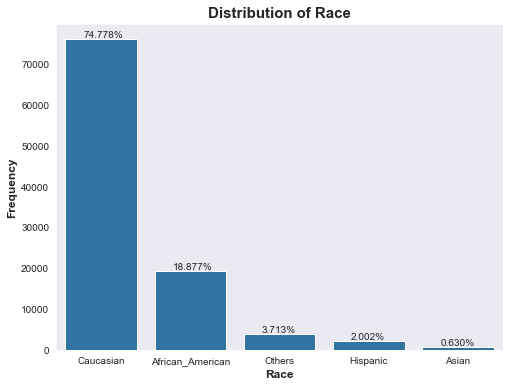

In [64]:
#race = ['Caucasian','African_American', 'Others', 'Hispanic', 'Asian']
race_order = diabetes['race'].value_counts().index
count_plot('race', None, race_order, 'Distribution of Race', 'Race', 'Frequency')

<span style = 'color:blue'>Evident from the distribution, it is seen that the **Caucasian** race has the highest occurrence of diabetic patients with **74.778%** of total treatments. This is followed by the **African_American** race with **18.877%**. The least with **0.630%** being the **Asian** race. There are patient's whose race are unidentified and labelled as **Others** with **3.713%**. The **Hispanic** race contains **2.002%** of the total patients observed.</span>

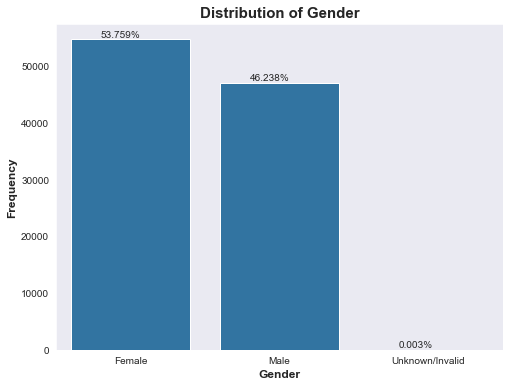

In [65]:
count_plot('gender', None, None, 'Distribution of Gender', 'Gender', 'Frequency')

<span style = 'color:blue'>The gender distribution shows that **53.759%** of the patients were female, while **46.238%** are male. **0.003%** of the gender are either unknown or invalid. **Does this actually mean that the female gender have a higher case of diabetes?**</span>

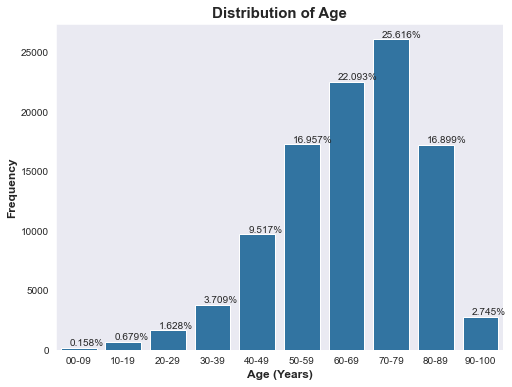

In [66]:
count_plot('age', None, None, 'Distribution of Age', 'Age (Years)', 'Frequency')

<span style = 'color:blue'>The age distribution shows a steep rise from **0-09 years** to **70-79 years**, and then a sharp decline to **80-89 years** and further decline to **90-100 years**. The age range **70-79 years** has the highest occurence of diabetes with **25.616%**, this is followed by **60-69** years with **22.093%**, and then **50-59** and **80-89 years** with **16.957%** and **16.899%** occurrences respectively. From this dataset, it appears the age of most diabetic patients range between **50 to 89 years** and also the number of diabetes patients increase as the age increases.**Is there a correlation between age and diabetes occurrence?** This feature is left skewed.</span>

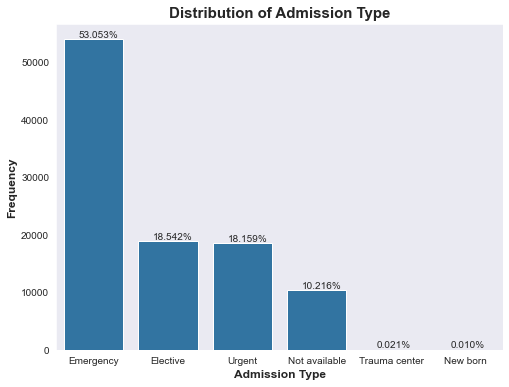

In [67]:
type_order = diabetes['admission_type'].value_counts().index
count_plot('admission_type', None, type_order, 'Distribution of Admission Type', 'Admission Type', 'Frequency')

<span style = 'color:blue'>**Emergency** admissions have the highest occurrence with **53.053%**, **Elective** and **Urgent** admissions have a very close cut with **18.542%** and **18,159%** respectively. Admissions whose types are unknown accounts for **10.216%** of total admissions while **Trauma center** and **New born** have **0.021%** and **0.010%** respectively. **Is there a correlation between the admission type and age?**</span>

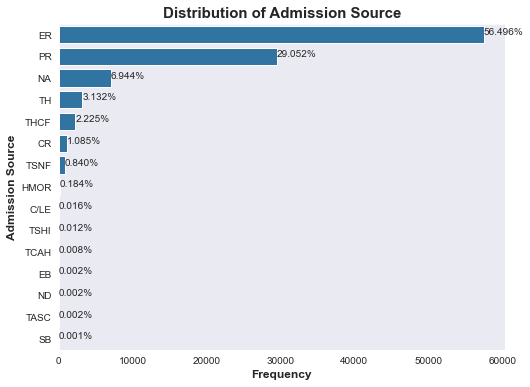

In [68]:
source_order = diabetes['admission_source'].value_counts().index
count_plot(None, 'admission_source', source_order, 'Distribution of Admission Source', 'Frequency', 'Admission Source')

<span style = 'color:blue'>It appaears majority of the patients visited the hospital via **Emergency** and **Physical Referals**. **Can we find a correlation between the Admission_source, age and/or admission_type?**</span>

**KEY:**
1. **PR**: Physical Referral
2. **CR**: Clinical Referral
3. **HMOR**: HMO Referral
4. **TH**: Transfer from Hospital
5. **TSNF**: Transfer from a Skilled Nursing Facility
6. **THCF**: Transfer from Health Care Facility
7. **ER**: Emergency Room
8. **C/LE**: Court/Law Enforcement
9. **NA**: Not Available
10. **TCAH**: Transfer from Critical Access Hospital
11. **ND**: Normal Delivery
12. **PD**: Premature Delivery
13. **SB**: Sick Baby
14. **EB**: Extramural Birth
15. Already defined in number 9.
16. No definition given.
17. **Null** was replaced with **NA**
18. **TAHHA**: Transfer From Another Home Health Agency
19. **RSHHA**: Readmission to Same Home Health Agency
20. **Not Mapped** replaced with **NA**
21. **Unknown/Invalid** replaced with **NA**
22. **TSHI**: Transfer from hospital inpt/same fac reslt in a sep claim
23. **BIH**: Born inside this hospital
24. **BOH**: Born outside this hospital
25. **TASC**: Transfer from Ambulatory Surgery Center
26. **THs**: Transfer from Hospice

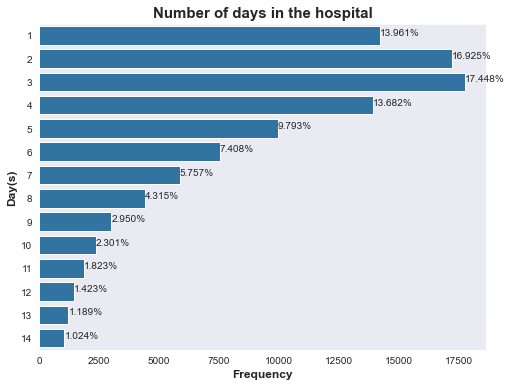

In [69]:
count_plot(None, 'days_in_hospital', None, 'Number of days in the hospital', 'Frequency', 'Day(s)')

<span style = 'color:blue'>This disribution shows the number of days patient's spend in the hospital. More patients spent less number of days ranging between **1 to 4 days** with **3 days** having the most occurrence with **17.448%**. There is a steep decline as the number of days increases, making the distibution **right skewed**, while tailing towards the right. This means less patient's spend more number of days in the hospital. On average, a patient spends approximately **4 days** in the hospital as can be seen in the summary statistics section. **Does the number of days spent have any relationship with age and/or admission type?***</span>

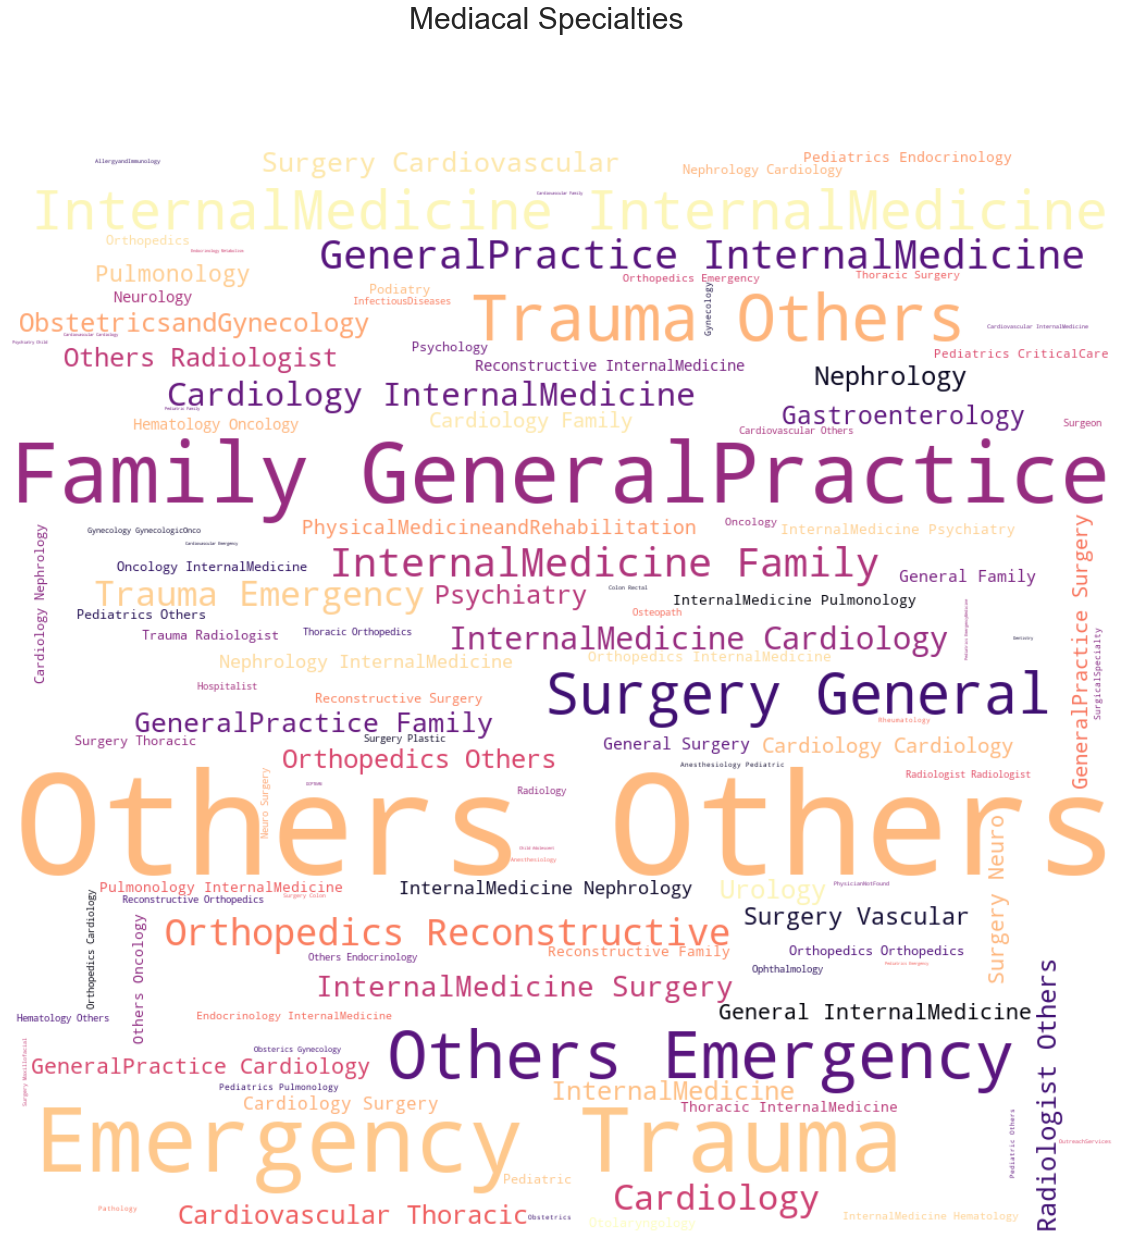

In [70]:
word_cloud('medical_specialty', 'Mediacal Specialties')

<span style = 'color:blue'>It appears majority of the patients have no preference on the specialty of the attending doctor as can be seen in the large font of **Others**, this is followed by **Emergency**, **Trauma**, **Family** and **General Practice**.</span>

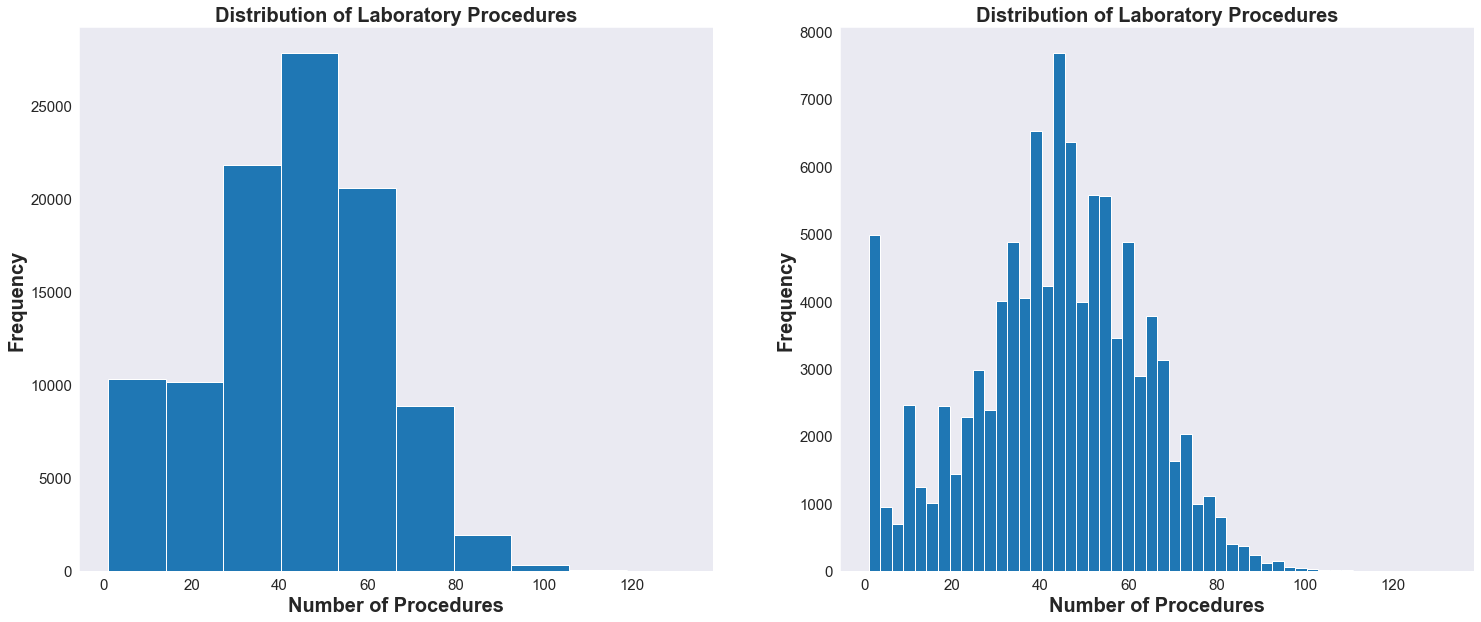

In [71]:
plt.figure(figsize = [25, 10])
plt.subplot(1, 2, 1)
plot(plt.hist,'lab_procedures', 'Distribution of Laboratory Procedures', 'Number of Procedures', 'Frequency', None)

plt.subplot(1, 2, 2)
plot(plt.hist,'lab_procedures', 'Distribution of Laboratory Procedures', 'Number of Procedures', 'Frequency', 50)

<span style = 'color:blue'>The default histogram did not give a clear distribution of the laboratory procedures. Increasing the bin size to 50, a betteditribution was obtained. The histogram have a normal distribution, though peaked at different points with maximum peak occuring between 40 t0 50 number of procedures, with a normal distribution.</span>

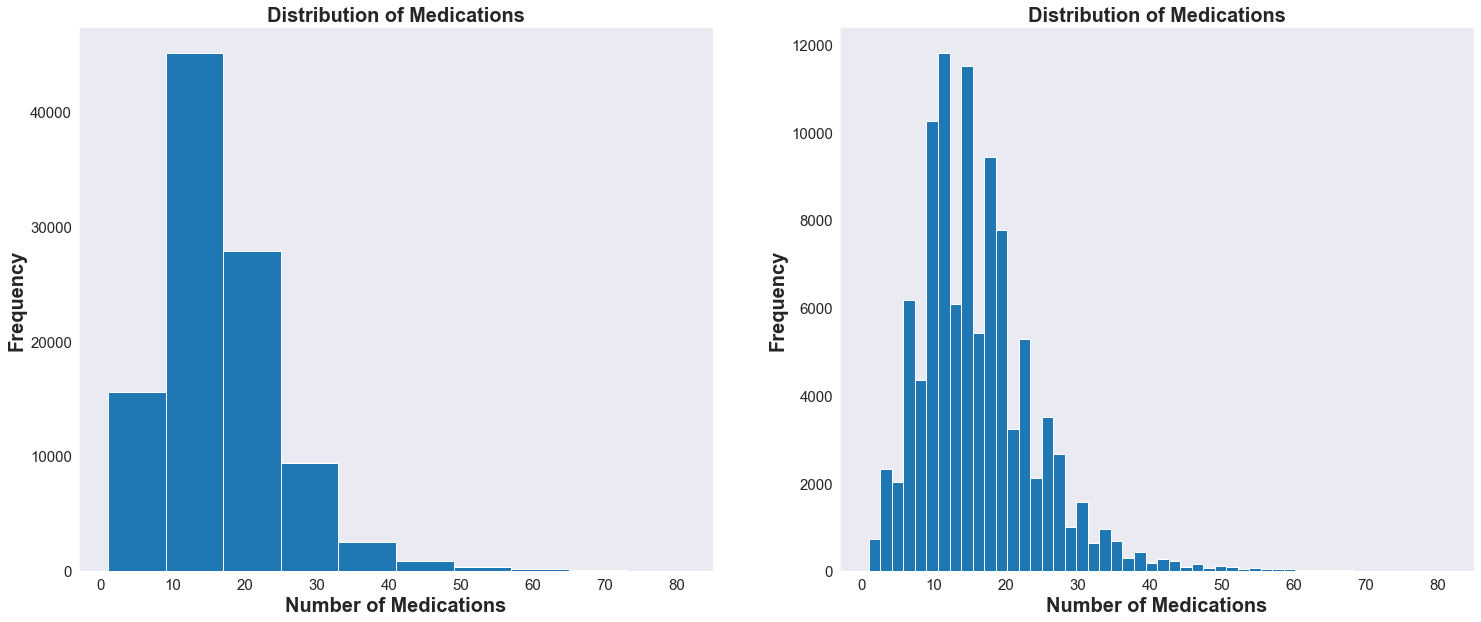

In [72]:
plt.figure(figsize = [25, 10])
plt.subplot(1, 2, 1)
plot(plt.hist, 'num_of_medications', 'Distribution of Medications', 'Number of Medications', 'Frequency', None)

plt.subplot(1, 2, 2)
plot(plt.hist, 'num_of_medications', 'Distribution of Medications', 'Number of Medications','Frequency', 50)

<span style = 'color:blue'>Using a bin size of 50, the default histogram was modified to give a clearer view of the distribution. The number of medications have a sharp increase fro zero (0) to about 10 and then tails down towards the right as the number of medicarions increase further. The maximum peak is between 10 and 13 medications. This distribution is right skewed. There are noticeable rise and falls in the number of medications between 10 and 30 medications.**Can we find any correlation between number of days in the hospital, number of procedures and number of medications?**</span>

In [73]:
# Count_plot_y(diabetes, 'outpatient', None, 'Distribution of Outpatient', 'Number of Outpatients', 'Frequency')
# Count_plot_y(diabetes, 'emergency', None, 'Distribution of Inpatient', 'Number of Intpatients', 'Frequency')
# Count_plot_y(diabetes, 'inpatient', None, 'Distribution of Emergency Patients', 'Number of Emergencies', 'Frequency')

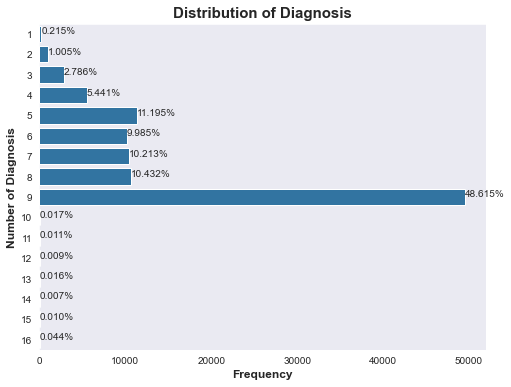

In [74]:
count_plot(None, 'diagnosis', None, 'Distribution of Diagnosis', 'Frequency', 'Number of Diagnosis')

<span style = 'color:blue'>There are very few patients that carried out more than 9 diagnosis during their hospital visit, witht the most number of diagnosis being **9** with **48.615%** and the least being **14** with **0.007%**. Does the number of diagnosis increase with the number of days spent in the hospital?**</span>

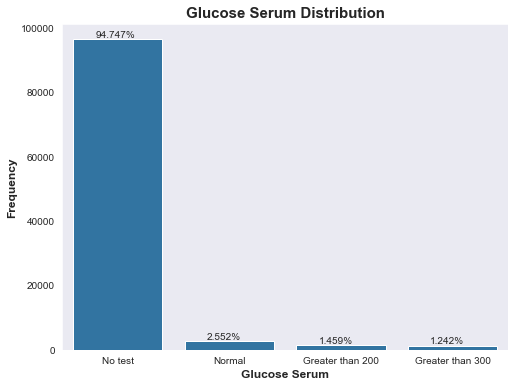

In [75]:
glucose_order = diabetes['glucose_serum'].value_counts().index
count_plot('glucose_serum', None, glucose_order, 'Glucose Serum Distribution', 'Glucose Serum', 'Frequency')

<span style = 'color:blue'>From all indications, **94.747%** amounting to about **96,420** patients did not perform the diabetes serum test. **Why? and what relationship does this establish with any other dataset**. Only **5.253%** of thw pateint's performed this test of which **2.552%** have a normal glucose level, **1.459%** and **1.242%** have glucose levels **greater than 200** and **greater than 300** respectively. **Does the glucose level have anything in common with age, race, gender or medications?**

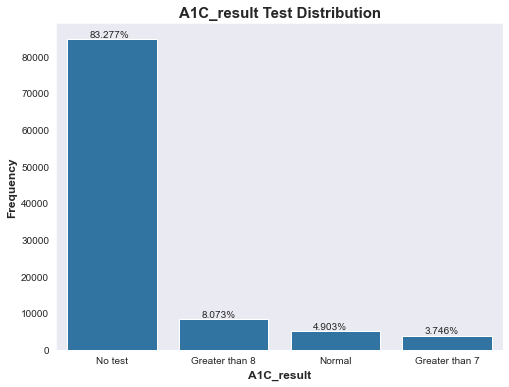

In [76]:
A1C_order = diabetes.A1C_result.value_counts().index
count_plot('A1C_result', None, A1C_order, 'A1C_result Test Distribution', 'A1C_result', 'Frequency')

<span style = 'color:blue'>With the normal A1C result level being below **5.7%** and above **5.7%** to **6.4%** showing a prediabetec conditon, the results obtained showed that **11.819%** of the patients are diabetic with **8.073%** having A1C result greater than **8%** and **3.746%** having A1C level greater than **7%**. Only **4.903%** have a normal level. Majority of the patients did not perform the test, **Why?**. **Does this have anything to do with age or any other feature in the dataset?**

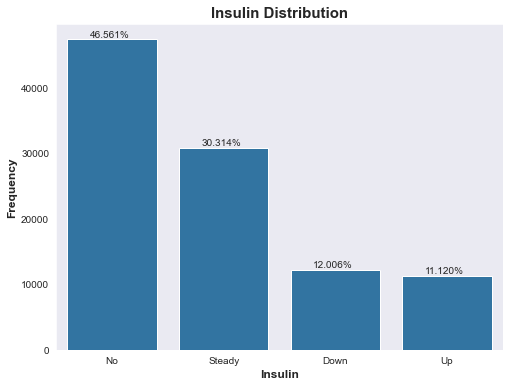

In [77]:
insulin_order = diabetes['insulin'].value_counts().index
count_plot('insulin', None, insulin_order, 'Insulin Distribution', 'Insulin', 'Frequency')

<span style = 'color:blue'>From all indications, most patients did not perform the insulin test as indicated by the bars. Only **30.314%** have a steady insulin level. **12.006%** and **11.120%** have low and high insulin levels respectively. **Does the insulin level correlate with the number of medications and days in the hospital?**

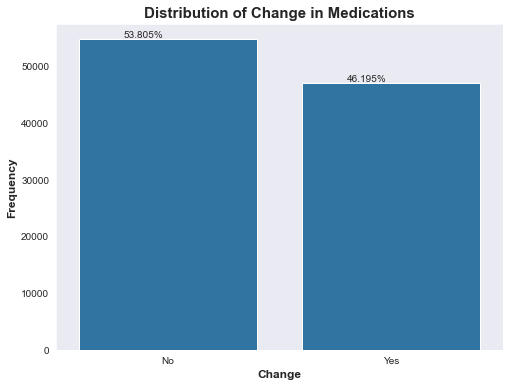

In [78]:
count_plot('change', None, None, 'Distribution of Change in Medications', 'Change', 'Frequency')

<span style = 'color:blue'>The distribution shows there was a change in the medications of **46.195%** of the total patients. These changes can be in the form of dosage or generic name of the diabetic medication, which might occur due to different reasons (reduction or increase in medication, generic change due to low or poor effectiveness etc). **53.805%** of the patients medication remained the same.</span>

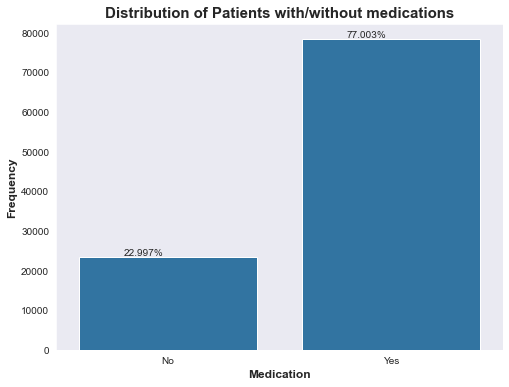

In [79]:
count_plot('medications', None, None, 'Distribution of Patients with/without medications', 'Medication', 'Frequency')

<span style = 'color:blue'>**77.003%** of patients have prescribed diabetic medications after visitong the hospital, while **22.997%** have no prescribed medication.</span>

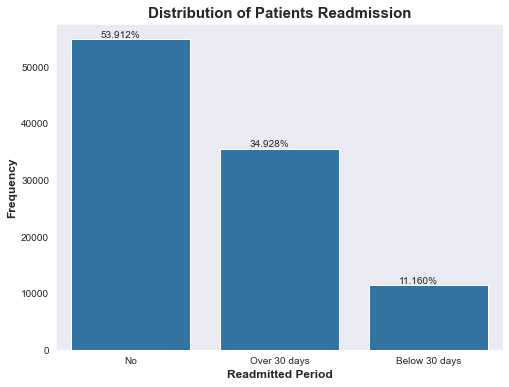

In [80]:
readmitted_order = diabetes['readmitted'].value_counts().index
count_plot('readmitted', None, readmitted_order, 'Distribution of Patients Readmission', 'Readmitted Period', 'Frequency')

<span style = 'color:blue'>Majority of the patients have no record of readmission in the hospital accounting for **53.912%** (approx. 54,864 patients) of the total patients. **34.928%** (approx. 35,544 patients) were readmitted for more than 30 days while **11.160%** (approx. 11,357 patients) were admitted for less than 30 days.</span>

## <span style = 'color:blue'> Bivariate Visualizations</span>
Let's explore relationships between features in the dataset

### <span style = 'color:blue'> Bivariate Functions</span>

In [81]:
# A user defined plot function
def plot_bi(kind, x_value, y_value, hue, title, x_label, y_label, order, color):
    """
    Function to create a defined visialization plot type using seaborn, matplotlib and other plot types.
    
    Args:
        kind: The type of plot visualization to be created. This has to be in the format: package_name.plotype.
              Example: sb.countplot, plt.scatter, etc.
        x_value: x-axis parameter enclosed in quoatation marks. Use None if not to be used for the plot type.
        y_value: y-axis parameter enclosed in quoatation marks. Use None if not to be used for the plot type.
        hue: Hue parameter enclosed in quoatation marks. Use None if not to be used for the plot type.
        title: Title of the plot, enclosed in quoatation marks.
        x_label: x-axis label, enclosed in quoatation marks.
        y_lable: x-axis label, enclosed in quoatation marks.
        order: Sort format. Use None if not to be used for the plot type.
        color: Plot color type. Use None if not to be used for the plot type.
    """
    plt.figure(figsize = [10,8])
    kind(data = diabetes, x = x_value, y = y_value, hue = hue, order = order, color = color)
    plt.title(title, size = 20)
    plt.xlabel(x_label, size = 20)
    plt.ylabel(y_label, size = 20)
    plt.xticks(size = 15)
    plt.yticks(size = 15)

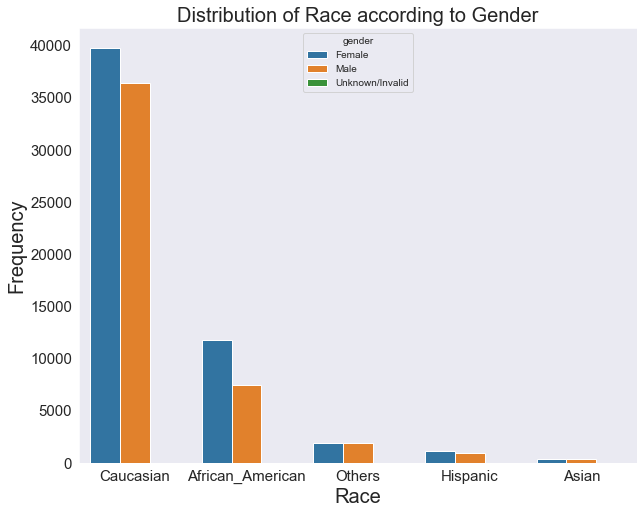

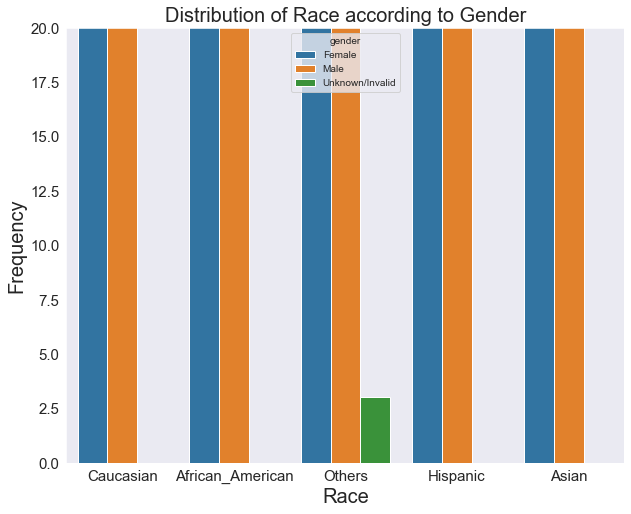

In [82]:
plot_bi(sb.countplot, 'race', None, 'gender', 'Distribution of Race according to Gender', 'Race', 'Frequency',
     race_order, None)

plot_bi(sb.countplot, 'race', None, 'gender', 'Distribution of Race according to Gender', 'Race', 'Frequency',
    race_order, None)
plt.ylim(0, 20);

<span style = 'color:blue'>The distribution of races with respect to gender shows that most diabetic patients are females as observable in the Caucasian and African_American. Unknown gender occurred in the race **Others** as can be seen in the second plot using a scaled y_limit. This can be an indication that people who did not declare their gender also did not want to make their race known. The Male and Female gender distibution have a close range in the races **Asian** and **Others**</span>

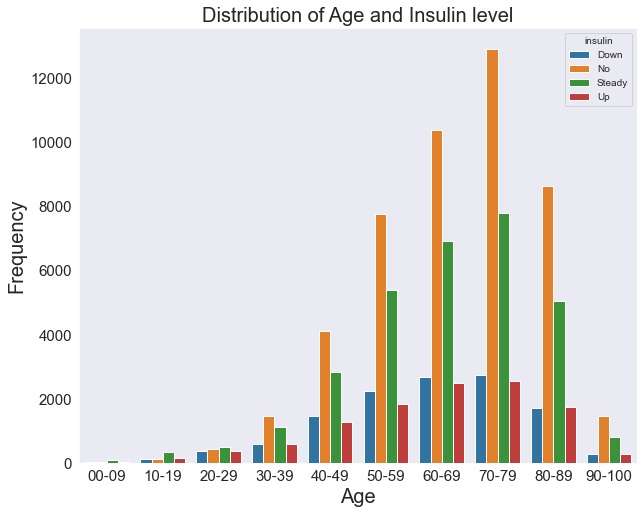

In [83]:
plot_bi(sb.countplot, 'age', None, 'insulin', 'Distribution of Age and Insulin level', 'Age', 'Frequency', None, None)

<span style = 'color:blue'>The insuline levels **Up** and **Down** which are diabetic symptoms increases with increase in age from all indications, thus resulting in more diabetic conditions. With most of the patients not having taken the insulin test, the next highest level are patients with steady insulin levels.</span>

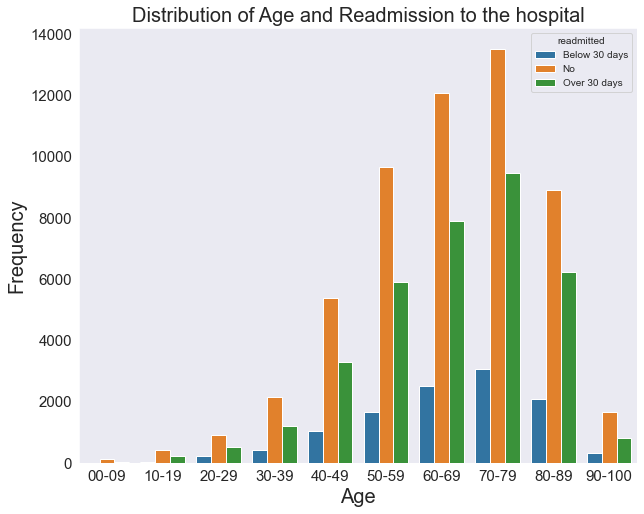

In [84]:
plot_bi(sb.countplot, 'age', None, 'readmitted', 'Distribution of Age and Readmission to the hospital',
        'Age', 'Frequency', None, None)

<span style = 'color:blue'>The distribution shows that among the age brackets, most of the patients were not readmitted for treatment. While some where readmitted for over 30 days, only a handfull stayed below 30 days after readmission. Also, majority of the readmitted patients are in the age bracket of **50-89 years**. The same age bracket have the highest number of patients too. This is an indication that diabetes is more pronounced within this age range.</span>

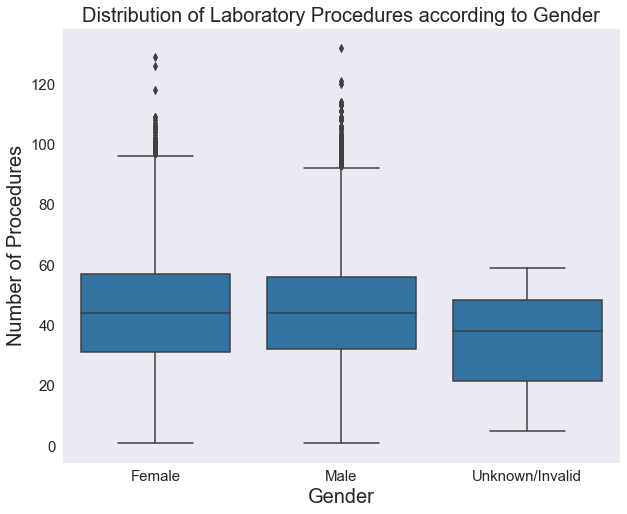

In [85]:
plot_bi(sb.boxplot, 'gender', 'lab_procedures', None, 'Distribution of Laboratory Procedures according to Gender',
    'Gender', 'Number of Procedures', None, sb.color_palette()[0])

<span style = 'color:blue'>The visualization above enumerates the distribution of laboratory procedures performed according to gender. The male and female gender appear to have the same median of about 45, and minimum value of zero(0), with lot of outliers visibly shown above the maximum values for both gender. The unclassified gender have median and minimum values different from the male and female gender. A noticeable occurrence is that the unclassified gender has no outlier values, and also the female gender being the most patients had the most number of laboratory procedures when the outlier values are not considered</span>

In [86]:
list(diabetes.columns)

['patient_id',
 'race',
 'gender',
 'age',
 'admission_type',
 'admission_source',
 'days_in_hospital',
 'medical_specialty',
 'lab_procedures',
 'num_of_medications',
 'outpatient',
 'emergency',
 'inpatient',
 'diagnosis',
 'glucose_serum',
 'A1C_result',
 'metformin',
 'insulin',
 'change',
 'medications',
 'readmitted']